### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV as Pandas DataFrame

In [4]:
# Read in csv
csv_path = Path("../Resources/tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path, index_col ="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.head()

,Close
Date,
2018-11-13,338.73
2018-11-14,344.00
2018-11-15,348.44
2018-11-16,354.31
2018-11-19,353.47


### Index Data by `Date`

In [3]:
# Set `Date` as index
tsla_df = tsla_df.set_index('Date')
tsla_df.head()

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47


### Assess and Clean Data

In [5]:
# Check for nulls
tsla_df.isnull().mean() * 100
tsla_df.isnull().sum()

# Drop missing values
tsla_df = tsla_df.dropna()

# Validate no more missing values
tsla_df.isnull().sum()
tsla_df.head()

,Close
Date,
2018-11-13,338.73
2018-11-14,344.00
2018-11-15,348.44
2018-11-16,354.31
2018-11-19,353.47


### Calculate Daily Returns

In [7]:
# Calculate daily returns
tsla_daily_returns = tsla_df.pct_change().dropna()
tsla_daily_returns.head()

,Close
Date,
2018-11-14,0.015558
2018-11-15,0.012907
2018-11-16,0.016847
2018-11-19,-0.002371
2018-11-20,-0.016918


### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [8]:
# Sort data by `Close` in descending order
tsla_top_changes = tsla_daily_returns.sort_values("Close", ascending=False)
tsla_top_changes.head()

,Close
Date,
2018-12-26,0.103930
2018-11-26,0.061903
2019-01-04,0.057697
2019-02-27,0.056671
2018-12-28,0.056116


### Slice Out 5 Records

In [9]:
# Slice out top 5
tsla_top_five = tsla_top_changes.iloc[:5]
tsla_top_five

,Close
Date,
2018-12-26,0.103930
2018-11-26,0.061903
2019-01-04,0.057697
2019-02-27,0.056671
2018-12-28,0.056116


### Plot Top 5 Performing Days for TSLA Daily Returns

<AxesSubplot:xlabel='Date'>

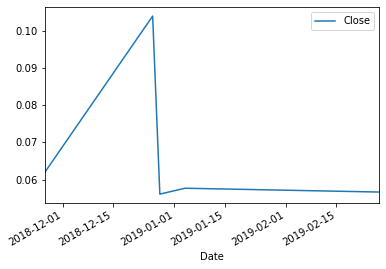

In [10]:
# Plot top 5 performing days
tsla_top_five.plot()

<AxesSubplot:xlabel='Date'>

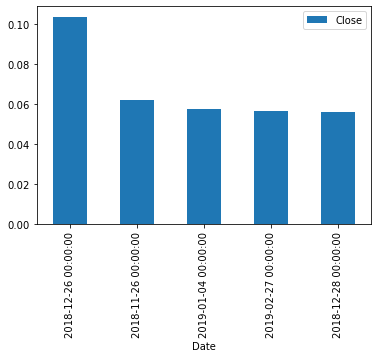

In [11]:
# Alternatively, visualizing the returns as a bar chart:
tsla_top_five.plot(kind='bar')